# Machine Learning Basics

## What is Machine Learning?
Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so.


<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=18tLsc2FFkTSJxLN3XZVLzETEKcjWhGIu" width="35%" height="35%" title="recommender system" alt="recommender system"></img>
  <figcaption>Image from NVIDIA Developer</figcaption>
</figure>

## Categories of Machine Learning

Machine Learning can be devided into 3 big categories!
- Supervised Learning
    - Build a predictive model from examples of data with known outcomes.
    - Given a training set of labeled examples, we estimate the prediction function by minimizing the prediction error on the training set.
- Unsupervised Learning
    - Discover the latent structure in data for which outcomes are not known (No output y).
- Reinforcement Learning
    - Learn by trial-and-error through reward or punishment.
    - The program learns to maximize reward without the human explicitly telling the rules.


<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=19EJn6f7JneYCY6NEoeMbUvWsthZIwj7k" width="40%" height="40%" title="recommender system" alt="recommender system"></img>
  <figcaption>Image from http://hochul.net/blog/data_analysis_machine_learning_basic_1s/machinelearningalgorithm/ </figcaption>
</figure>

## Supervised Learning

**Training**: given a training set of **labeled examples**, estimate the prediction function $f$ by minimizing the prediction error on the training set  
**Test**: apply $f$ to be a never before seen test example $x$ and output the predicted value $y = f(x)$

There are 2 representative tasks for supervised learning!
- Regression : Output is a number
- Classification : Output is a label (binary or multi-class)

### Regression : Linear Regression

Linear regression is the most basic and simple approach to supervised learning.  
It assumes that there is approximately a linear relationship between $X$ and $y$.

<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=18OhFLae1mn2wClevQbMnAHF3Ft_wc_Rc" width="40%" height="40%" title="recommender system" alt="recommender system"></img>
</figure>

So we aim to find the yellow line in Linear Regression task.

#### Linear Regression Example : Housing Price Prediction
As we learn in the lecture1, We are going predict Boston House Price using linear regression!

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation

#### Boston housing price dataset description

The Boston data frame has 506 rows and 14 columns.

````crim````: per capita crime rate by town.  
````zn````: proportion of residential land zoned for lots over 25,000 sq.ft.  
````indus````: proportion of non-retail business acres per town.  
````chas````: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).  
````nox````: nitrogen oxides concentration (parts per 10 million).  
````rm````: average number of rooms per dwelling.  
````age````: proportion of owner-occupied units built prior to 1940.  
````dis````: weighted mean of distances to five Boston employment centres.  
````rad````: index of accessibility to radial highways.  
````tax````: full-value property-tax rate per \$10,000.  
````ptratio````: pupil-teacher ratio by town.  
````black````: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.  
````lstat````: lower status of the population (percent).  
````medv````: median value of owner-occupied homes in \$1000s.  

#### Goal: Predict ````medv```` (response) using ````lstat```` (predictor)

In [2]:
# load data
boston = pd.read_csv('Boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273.00,21.00,393.45,6.48,22.00


#### Simple Data Exploration
First, Let's check out how data looks like

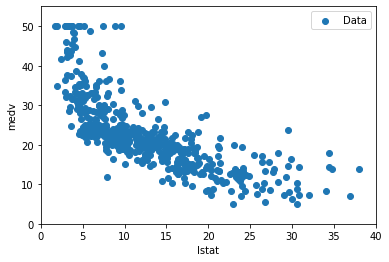

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(boston.lstat.values, boston.medv.values, label='Data');
ax.set_xlabel("lstat");
ax.set_ylabel("medv");
ax.legend();
plt.xlim(0, 40);
plt.ylim(0, 55);

#### Simple Linear Regression using Scikit-Learn

In [4]:
from sklearn.linear_model import LinearRegression

# LR model with intercept
LR_sklearn = LinearRegression(fit_intercept=True)

X_train = boston['lstat'].values.reshape(-1, 1) # Input (X)
y_train = boston['medv'].values # Ground Truth (y)
LR_sklearn.fit(X_train, y_train)
(LR_sklearn.intercept_, LR_sklearn.coef_)

(34.55384087938311, array([-0.95004935]))

#### Drawing the regresion line on top of the scatterplot

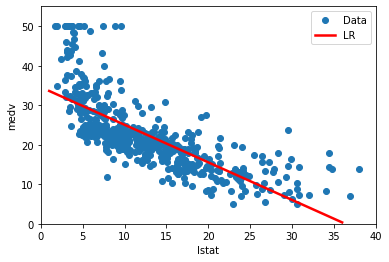

In [5]:
fig, ax = plt.subplots()
boston.plot(x="lstat", y="medv", style="o", ax=ax) # plot using pandas
ax.set_ylabel("medv")
xs = range(int(np.min(X_train[:,0])), int(np.max(X_train[:,0])))
xs = np.array(xs).reshape(-1,1)
ys = LR_sklearn.predict(xs)
ax.plot(xs, ys, 'r', linewidth=2.5);
ax.legend(['Data',"LR"]);
plt.xlim(0, 40);
plt.ylim(0, 55);

It seems like our model is well fitted to the data!

#### Multivariate Linear Regression

Can we use more features? it looks wasteful not using the all given feature!    
As we learned in lecture, we can easily extend to **multivariate settings**! (Higher Dimension)

<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=18EmMHQbcZ4aW7xk1Kkqv8HEDsc3CqgeB" width="30%" height="30%" title="recommender system" alt="recommender system"></img>
</figure>

We can use above mentioned features in Boston Dataset.
<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=188XYn1wlIV23uV63jo-bDUb9HtjWLNYZ" width="50%" height="50%" title="recommender system" alt="recommender system"></img>
</figure>

In [6]:
# regression with 2 input columns
X_train = boston[["lstat", "age"]]
y_true = boston['medv']
ols_sklearn_2 = LinearRegression()
ols_sklearn_2.fit(X_train, y_true)
(ols_sklearn_2.intercept_, ols_sklearn_2.coef_)

(33.2227605317929, array([-1.03206856,  0.03454434]))

In [7]:
# regression using all input columns
xcols = boston.columns[:-1] # Last column is the label column
X_train = boston[xcols]
y_true = boston['medv']
ols_sklearn_3 = LinearRegression()
ols_sklearn_3.fit(X_train, y_true)
(ols_sklearn_3.intercept_, ols_sklearn_3.coef_)

(36.4594883850902,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

### Classification : Logistic Regression

The linear regression model assumes that the response variable $y$ is quantitative.  
But in many situations, the response variable is instead **qualitative** or **categorical**, leading to **classification problem**.  

Often we are more interested in estimating the probabilities that $X$ belongs to each category.

Logistic regression models are linear models for classification

We use the logistic function (a type of **“S”-shaped sigmoid function**)  
- $P\left(y_{i}=1 \mid X_{i} ; \boldsymbol{\beta}\right)=\frac{e^{\beta_{0}+\beta_{1} X_{i 1}+\cdots+\beta_{p} X_{i p}}}{1+e^{\beta_{0}+\beta_{1} X_{i 1}+\cdots+\beta_{p} X_{i p}}}=\frac{e^{X_{i}\boldsymbol{\beta}}}{1+e^{X_{i} \boldsymbol{\beta}}}=\operatorname{sigmoid}\left(X_{i}\right)=\sigma\left(X_{i}\right)$
    
<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=18R_JLCuSV1G6-Ppar1dTSRu5LpQg4EJq" width="50%" height="50%" title="recommender system" alt="recommender system"></img>
</figure>

Let's predict the stock market direction with logistic regression!

#### Smarket: S&P Stock Market dataset description

A data frame with 1250 observations on the following 9 variables.

``Year``: The year that the observation was recorded  
``Lag1``: Percentage return for previous day  
``Lag2``: Percentage return for 2 days previous  
``Lag3``: Percentage return for 3 days previous  
``Lag4``: Percentage return for 4 days previous  
``Lag5``: Percentage return for 5 days previous  
``Volume``: Volume of shares traded (number of daily shares traded in billions)  
``Today``: Percentage return for today  
``Direction``: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day

In [8]:
smarket = pd.read_csv('Smarket.csv')
smarket.Direction = smarket.Direction.astype('category')
smarket['Day']=smarket.index
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Day
0,2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up,0
1,2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up,1
2,2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down,2
3,2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up,3
4,2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up,4


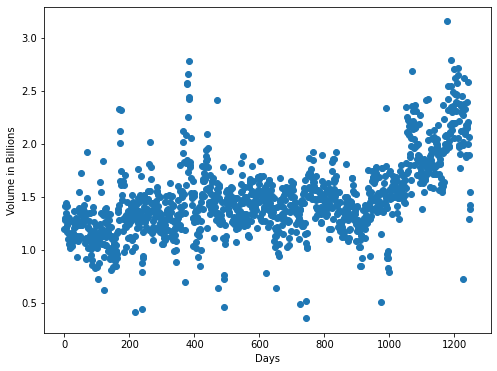

In [9]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(smarket.Day, smarket.Volume);
ax.set_xlabel('Days');
ax.set_ylabel('Volume in Billions');

In [10]:
from sklearn.linear_model import LogisticRegression

X = smarket.loc[:,'Lag1':'Volume']
y = smarket.Direction

logistic_sklearn = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
logistic_sklearn_fit = logistic_sklearn.fit(X, y)

print("Intercept: {}".format(logistic_sklearn_fit.intercept_))
print("Coefficients: {}".format(logistic_sklearn_fit.coef_))

Intercept: [-0.12600781]
Coefficients: [[-0.07307339 -0.04230074  0.01108552  0.00935968  0.01031339  0.13544567]]


In [16]:
y_pred = logistic_sklearn_fit.predict_proba(X)[:, 0]
y_pred_class = logistic_sklearn_fit.predict(X)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y, y_pred_class)
print('Accuracy: {} \n'.format(acc))

# prediction summary
pd.DataFrame({'prob_0': y_pred, 'prob_1': 1 - y_pred, 'pred_class': y_pred_class, 'ground_truth': y},  columns=['prob_0', 'prob_1', 'pred_class', 'ground_truth'])

Accuracy: 0.5216 



,prob_0,prob_1,pred_class,ground_truth
0,0.49,0.51,Up,Up
1,0.52,0.48,Down,Up
2,0.52,0.48,Down,Down
3,0.48,0.52,Up,Up
4,0.49,0.51,Up,Up
...,...,...,...,...
1245,0.48,0.52,Up,Up
1246,0.49,0.51,Up,Down
1247,0.46,0.54,Up,Up
1248,0.47,0.53,Up,Down


## Unsupervised Learning
Discover the latent structure in data ($x_1, x_2, ..., x_n$) for which outcomes are not known (No output $y$).  
The most representative task is **Cluster Analysis**.  
  
**Cluster Analysis** is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than those in other groups (clusters).

<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=196k1nOo9Ws-ay8Mfyiy-7VAHcWsp2gMS" width="30%" height="30%" title="recommender system" alt="recommender system"></img>
</figure>

### K-Means Clustering
K-means clustering is the most basic algorithm for clustering task.  
K-means clustering minimizes within-cluster variances by iteratively updating centroids position until convergence.

<figure class="image">
  <img src="https://drive.google.com/uc?export=view&id=19-PyMuREjW2Iya3TumxPforhE9uVDQ_1" width="50%" height="50%" title="recommender system" alt="recommender system"></img>
</figure>

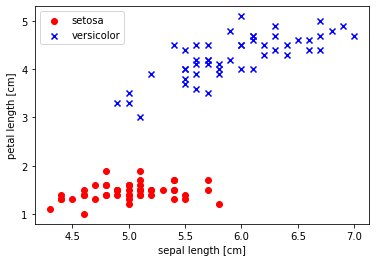

In [17]:
#Iris_data_k-means_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Plotting the Iris data
#select setosa and versicolor
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

#plot data
plt.scatter(X[:50, 0], X[:50, 1],
color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [18]:
#Kmeans processing
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04,random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],X[y_km == 0, 1], s=50, c='lightgreen',
marker='s',edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange',
marker='o',edgecolor='black',label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
s=250, marker='*', c='red', edgecolor='black',
label='centroids')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

ModuleNotFoundError: No module named 'sklearn.cluster'